# Random Walk

## Random Walker in one dimension

### Importing modules

In [4]:
import math as m
import numpy as np
import numpy.random as r
import matplotlib.pyplot as plt
import matplotlib.animation as ani
# help(numpy.random)
#from IPython import display
#plt.rcParams['animation.ffmpeg_path'] = '/path_to_your/ffmpeg'

### Generation of random positions

In [5]:
events = int(1e3)
print("Number of events: {0}".format(events))
steps = r.choice((-1,1),events)
print("Random steps:{0}\n".format(steps))

walker = np.cumsum(steps)
print(walker)

print("Maximum position of the walker is: {0}, reached at time {1},\nwhile the minimum is {2}, reached at time {3}".format(max(walker),np.argmax(walker),min(walker),np.argmin(walker)))
print("The walker reaches the position x=20 at times = {0}".format(np.where(walker == 20)))

Number of events: 1000
Random steps:[-1 -1 -1  1  1  1  1 -1 -1  1  1  1 -1  1 -1  1 -1  1  1  1 -1 -1 -1 -1
 -1  1  1 -1  1  1 -1 -1  1  1  1 -1 -1 -1  1  1  1 -1  1 -1 -1  1 -1 -1
 -1 -1 -1  1  1  1  1  1 -1  1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1
  1 -1  1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1  1  1  1
  1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1  1  1  1 -1
  1 -1  1 -1 -1  1 -1 -1  1 -1  1 -1  1  1 -1  1  1  1 -1  1 -1 -1  1 -1
  1  1  1 -1  1  1  1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1  1  1 -1 -1  1  1
 -1  1  1  1 -1  1  1 -1  1  1  1 -1  1 -1 -1  1 -1  1  1 -1 -1 -1 -1  1
  1 -1  1  1  1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1
 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1  1 -1  1  1 -1  1 -1 -1 -1 -1  1 -1
  1 -1 -1  1 -1  1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1
 -1  1  1 -1 -1  1  1  1 -1  1  1  1 -1  1 -1  1  1  1 -1 -1 -1 -1  1 -1
 -1  1 -1 -1  1 -1  1  1 -1  1  1 -1  1 -1 -1 -1  1 -1  1 -1  1 -1  1 -1
  1  1  1  1 -1

### Plotting results

#### Static plot

Plotting position of the walker in a static (x,t) plot

Text(0.5, 1.0, 'Random Walker in 1D for 1000 steps')

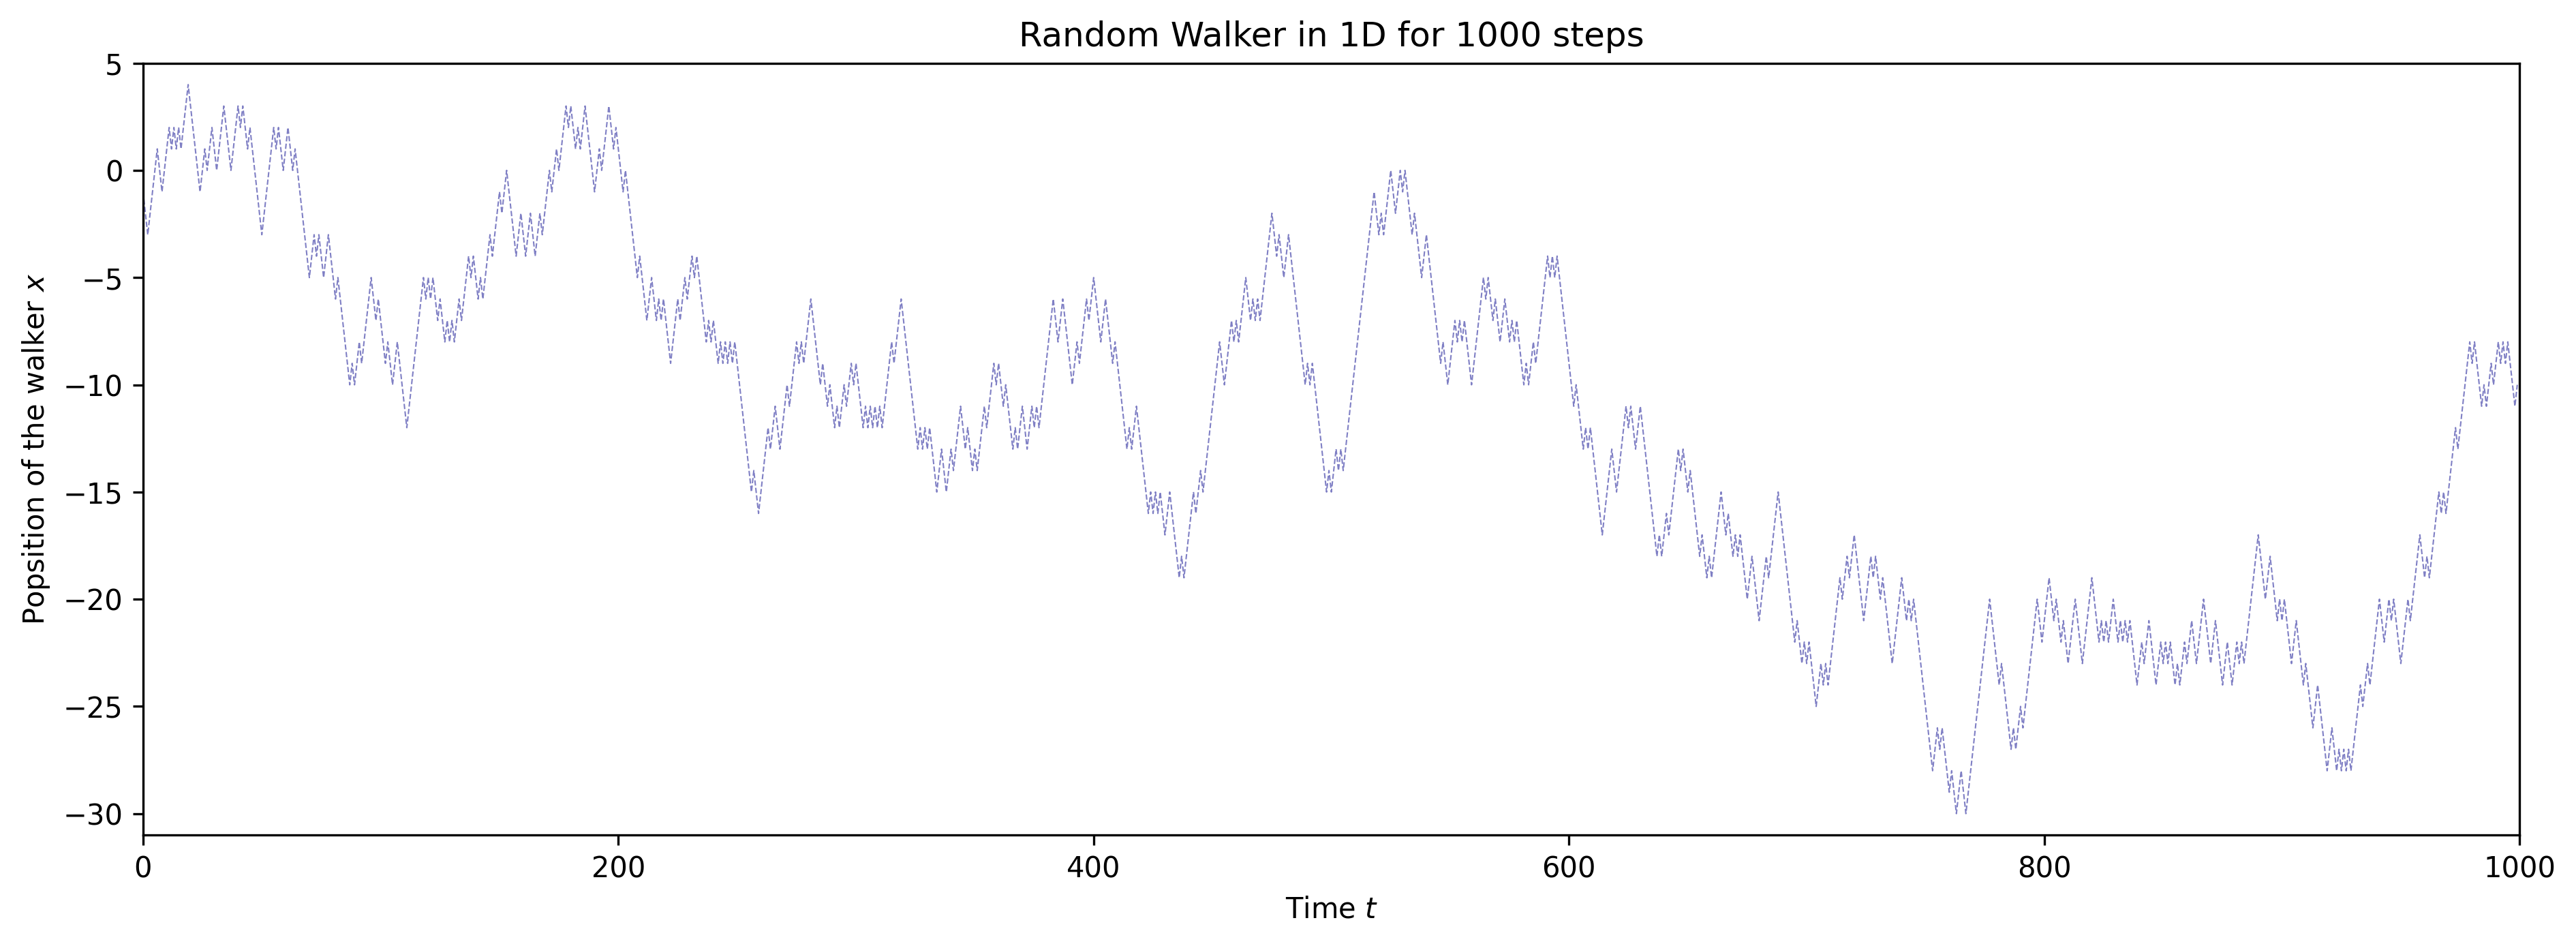

In [6]:
%matplotlib inline
fig = plt.figure(figsize=(15,5),dpi=300)
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, events), ylim=(min(walker)-1 ,max(walker)+1))
ax.set_xlabel("Time $t$")
ax.set_ylabel("Popsition of the walker $x$")
ax.plot(walker,'--',c='darkblue', alpha=0.5,lw=0.5)
plt.title("Random Walker in 1D for {0} steps".format(events))

#### Animated plot
First, we draw the initial state of plot, $(0,x(0))$, then, we generate the other subplots and at the end, animate them.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
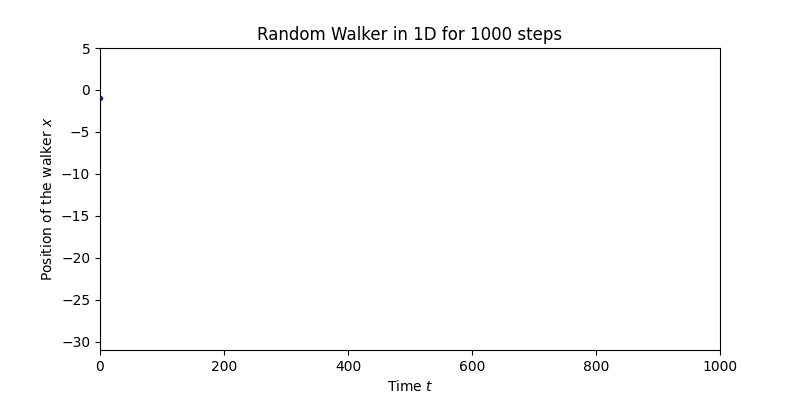

In [9]:
%matplotlib ipympl
#%matplotlib notebook
#%matplotlib widget

times = np.arange(events)

# plot setup
fig = plt.figure(figsize=(8,4),dpi=100)
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, events), ylim=(min(walker)-1 ,max(walker)+1))
ax.set_xlabel("Time $t$")
ax.set_ylabel("Position of the walker $x$")
ax.set_title("Random Walker in 1D for {0} steps".format(events))
position, *_ = ax.plot(times[0], walker[0], '.', alpha=0.8, lw=2, color='mediumblue')
trajectory, *_ = ax.plot(times[0], walker[0], '--', alpha=0.5, lw=0.5, color='darkblue')

# functions that updates the plot at each time i
def update_plots(i):
    position.set_data(times[i], walker[i])
    trajectory.set_data(times[:i], walker[:i])
    # Return a tuple
    return position, trajectory

aniplot = ani.FuncAnimation(fig, update_plots, np.arange(1, events), interval=5, blit=True, repeat=False)
plt.show()

## Statistics on 1D Random Walker

In [10]:
number_walkers = int(1e3)
positions2D = r.choice((-1,1),(events,number_walkers))

walkers = np.cumsum(positions2D, axis = 1)

max_distances = np.max(np.absolute(walkers),axis=1)
print("The walker gone further away in the x axis is the number {0}, with a distance of {1}".format(np.argmax(np.max(walkers,axis=1)) ,np.max(max_distances)))

The walker gone further away in the x axis is the number 584, with a distance of 118


### Plotting maximum distances

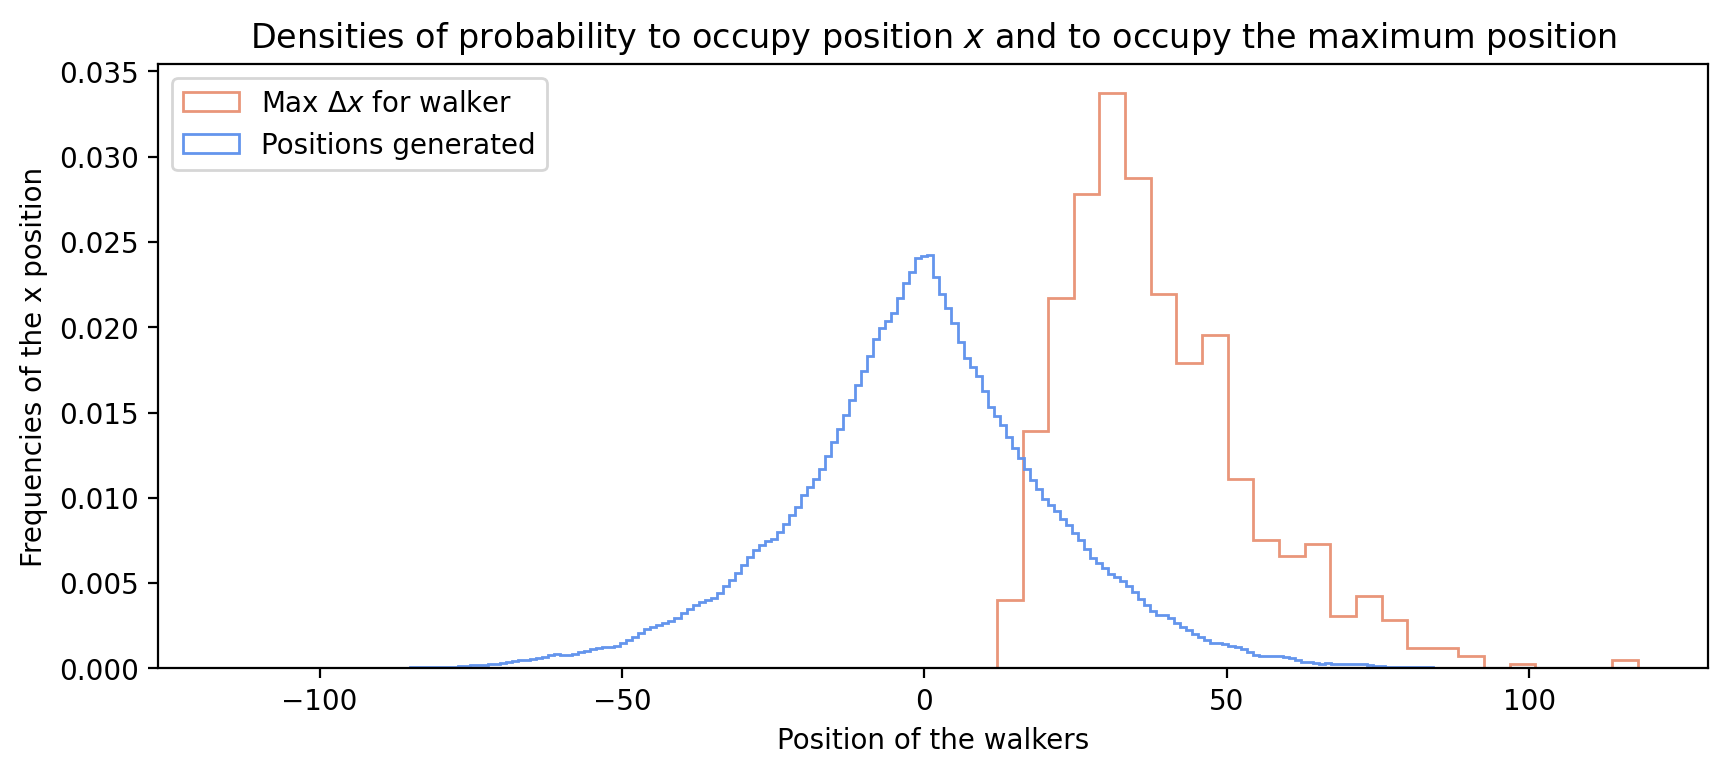

In [11]:
%matplotlib inline

fig = plt.figure(figsize=(10,4),dpi=200)
plt.hist(max_distances, bins=int(len(set(max_distances))/3), label="Max $\Delta x$ for walker", density=True, histtype ='step', color = 'darksalmon')
plt.hist(walkers.flat, bins=int(len(set(walkers.flat))), label="Positions generated", histtype ='step', density=True, color = 'cornflowerblue')
plt.xlabel("Position of the walkers")
plt.ylabel("Frequencies of the x position")
plt.title("Densities of probability to occupy position $x$ and to occupy the maximum position")
plt.legend(loc='upper left')

### Animated plot of a specific walker

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
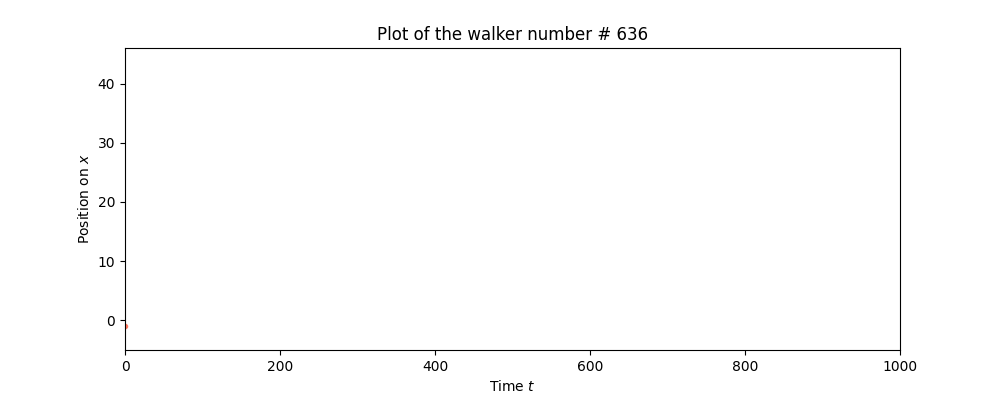

In [12]:
# we randomically choose a walker
identifier = r.choice(np.arange(number_walkers))

%matplotlib ipympl
fig = plt.figure(figsize=(10,4),dpi=100)
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, events), ylim=(min(walkers[identifier,:])-1 ,max(walkers[identifier,:])+1))
ax.set_title("Plot of the walker number # {0}".format(identifier))
ax.set_xlabel("Time $t$")
ax.set_ylabel("Position on $x$")

location, *_ = ax.plot(times[0], walker[0], '.', alpha=0.8, lw=2, color='tomato')
path, *_ = ax.plot(times[0], walker[0], '--', alpha=0.5, lw=0.5, color='coral')

def add_a_plot(i):
    location.set_data(times[i], walkers[identifier,i])
    path.set_data(times[:i], walkers[identifier,:i])
    # Return a tuple
    return location, path

anirandom = ani.FuncAnimation(fig, add_a_plot, np.arange(1, events), interval=30, blit=True, repeat=False)
plt.show()



In [3]:
plt.close()

NameError: name 'plt' is not defined